In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [52]:
flow_sch = pd.read_csv("../../Data_Sets/Bees/flow_schwartau.csv")

In [53]:
flow_sch.head()

,timestamp,flow
0,2017-01-01 14:15:00,0
1,2017-01-01 14:16:00,0
2,2017-01-01 14:17:00,0
3,2017-01-01 14:18:00,0
4,2017-01-01 14:19:00,0


In [54]:
flow_sch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2513836 entries, 0 to 2513835
Data columns (total 2 columns):
timestamp    object
flow         int64
dtypes: int64(1), object(1)
memory usage: 38.4+ MB


In [55]:
flow_sch['timestamp'] = pd.to_datetime(flow_sch['timestamp'])

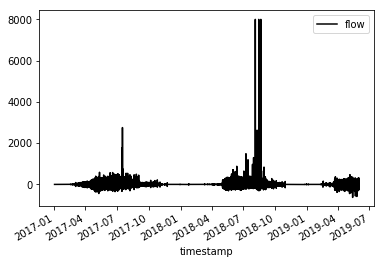

In [56]:
flow_sch.plot(kind='line', x='timestamp', y='flow', color='black')

In [57]:
humidity_sch = pd.read_csv("../../Data_Sets/Bees/humidity_schwartau.csv")

In [58]:
humidity_sch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 2 columns):
timestamp    1761 non-null object
humidity     1749 non-null float64
dtypes: float64(1), object(1)
memory usage: 27.6+ KB


In [59]:
humidity_sch[humidity_sch['humidity'].isnull()]

,timestamp,humidity
378,2017-07-09 14:00:00,NaN
379,2017-07-10 02:00:00,NaN
380,2017-07-10 14:00:00,NaN
381,2017-07-11 02:00:00,NaN
382,2017-07-11 14:00:00,NaN
383,2017-07-12 02:00:00,NaN
384,2017-07-12 14:00:00,NaN
385,2017-07-13 02:00:00,NaN
386,2017-07-13 14:00:00,NaN
387,2017-07-14 02:00:00,NaN


In [60]:
humidity_sch.fillna(method = 'ffill', inplace=True )

In [61]:
humidity_sch['timestamp'] = pd.to_datetime(humidity_sch['timestamp'])

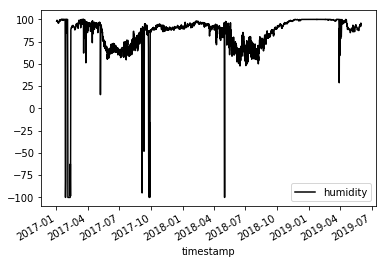

In [62]:
humidity_sch.plot(kind='line', x='timestamp', y='humidity', color='black')

In [63]:
humidity_sch.describe()

,humidity
count,1761.000000
mean,83.916071
std,26.442914
min,-100.000000
25%,78.871236
50%,91.028056
75%,96.596944
max,100.000000


In [81]:
humidity = []
for i in range(0, len(humidity_sch)):
    if humidity_sch['humidity'][i]<0:
        humidity.append(humidity_sch['humidity'][i-1])
        print (humidity_sch['humidity'][i-1])
    else:
        humidity.append(humidity_sch['humidity'][i])
    humidity_sch['humidity'][i] = humidity[i]

c:\users\spencer\anaconda3\envs\jacktor\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


42.968611111111116
42.968611111111116
42.968611111111116
42.968611111111116
42.968611111111116
42.968611111111116
42.968611111111116
42.968611111111116


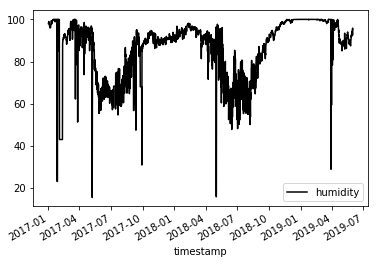

In [82]:
humidity_sch.plot(kind='line', x='timestamp', y='humidity', color='black')